In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from groundupml.utils.data_manipulation import split_data
#from groundupml.utils.data_tools import confusion_matrix
from groundupml.utils.functions import one_hot_to_class, sigmoid, to_one_hot

%matplotlib inline

In [2]:

def scale_min_max(data):
    col_mins = np.nanmin(data, axis=0)
    col_maxes = np.nanmax(data, axis=0)
    data_scaled = (data - col_mins) / (col_maxes - col_mins)

    return data_scaled 

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, y_train, X_test, y_test = split_data(X, y, proportion=0.8)

# Scale features to be between 0 and 1 for NN
X_train = scale_min_max(X_train)
X_test = scale_min_max(X_test)

# Convert labels to one hot vectors
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)


print('Train shapes', X_train.shape, y_train.shape)
print('Test shapes', X_test.shape, y_test.shape)

Train shapes (120, 4) (120, 3)
Test shapes (30, 4) (30, 3)


In [3]:
# Define weight and bias matrices

np.random.seed(1)  # For consistency when initializing matrices

n_samples, n_features = X_train.shape
INPUT_LAYER_SIZE = n_features  # Input layer has same number of nodes as X has features
HIDDEN_LAYER_SIZE = 3
OUTPUT_LAYER_SIZE = y_train.shape[1]  # Number of classes for classification

print(f'''
Input: {INPUT_LAYER_SIZE}
Hidden: {HIDDEN_LAYER_SIZE}
Output: {OUTPUT_LAYER_SIZE}''')

# 4x3 weight matrix 1
W1 = np.random.randn(INPUT_LAYER_SIZE,  
                     HIDDEN_LAYER_SIZE)

# Bias matrix 1 -- X*W1 -> (n_samples, HIDDEN_SIZE)
B1 = np.random.randn(HIDDEN_LAYER_SIZE,
                     1)

# 3x3 weight matrix 2
W2 = np.random.randn(HIDDEN_LAYER_SIZE,
                     OUTPUT_LAYER_SIZE)

# Bias matrix 2
B2 = np.random.randn(OUTPUT_LAYER_SIZE,
                     1)

print(W1)
print()
print(W2)


Input: 4
Hidden: 3
Output: 3
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]]

[[-1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918]
 [ 1.14472371  0.90159072  0.50249434]]


In [4]:
def sigmoid_prime(x):
    # Returns the result of the derivative of the sigmoid function applied to x
    return np.exp(-x) / (1 + np.exp(-x))**2

def squared_error(y_actual, y_pred):
    return 0.5 * np.sum((y_actual - y_pred)**2)

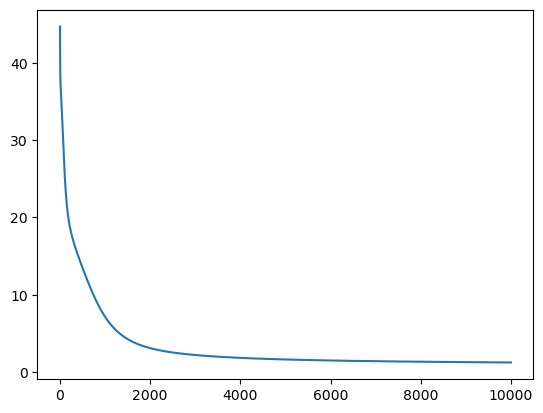

In [5]:
n_epochs = 10000
learning_rate = 1e-2

costs = []
for i in range(n_epochs):
    # Forward propogation
    Z2 = X_train.dot(W1) + B1.T
    A2 = sigmoid(Z2)
    Z3 = A2.dot(W2) + B2.T
    y_pred = sigmoid(Z3)
    costs.append(squared_error(y_pred, y_train))

    # Backward propogation

    # Calculate gradients
    delta3 = -(y_train - y_pred) * sigmoid_prime(Z3)
    partialj_wrt_w2 = np.dot(A2.T, delta3)

    delta2 = np.dot(delta3, W2.T) * sigmoid_prime(Z2)
    partialj_wrt_w1 = np.dot(X_train.T, delta2)

    # NOTE: equivalent to np.sum(delta.T, axis=1)
    # TODO: Check if math is correct
    partialj_wrt_b2 = np.dot(delta3.T, np.ones((delta3.shape[0], 1)))  
    partialj_wrt_b1 = np.dot(delta2.T, np.ones((delta2.shape[0], 1)))


    # Update weights using calculated gradients
    W1 -= learning_rate * partialj_wrt_w1
    W2 -= learning_rate * partialj_wrt_w2
    B1 -= learning_rate * partialj_wrt_b1
    B2 -= learning_rate * partialj_wrt_b2

plt.plot(costs)

In [6]:
# Get test predictions

print(B1.T.shape)

# Forward propogate using trained weights
Z2 = X_test.dot(W1) + B1.T
A2 = sigmoid(Z2)
Z3 = A2.dot(W2) + B2.T
y_pred = sigmoid(Z3)

print(y_pred)


(1, 3)
[[9.88926381e-01 1.76589420e-02 1.37758306e-06]
 [9.50466353e-04 6.94072078e-03 9.95553755e-01]
 [9.89915581e-01 1.57261712e-02 1.26057999e-06]
 [9.18920746e-04 6.34904654e-03 9.96072330e-01]
 [7.70142084e-03 9.81990933e-01 1.29037965e-02]
 [9.93835151e-01 8.16898460e-03 7.75680930e-07]
 [1.06501793e-03 1.13843221e-02 9.92405534e-01]
 [7.58043170e-03 9.73001889e-01 1.74295877e-02]
 [7.69593987e-03 9.61336253e-01 2.18545608e-02]
 [9.04664873e-04 5.97195822e-03 9.96337453e-01]
 [9.23287433e-03 9.76428103e-01 1.13389531e-02]
 [9.88778751e-01 1.81598816e-02 1.40303689e-06]
 [5.14794466e-03 9.19145816e-01 7.15674536e-02]
 [9.92350801e-01 1.10993669e-02 9.68049435e-07]
 [1.29927978e-03 2.06049864e-02 9.83806015e-01]
 [1.24098865e-03 1.92707747e-02 9.85754595e-01]
 [1.42621187e-02 9.90200062e-01 2.90123305e-03]
 [1.95949778e-03 1.31644333e-01 8.86392998e-01]
 [1.76022532e-03 1.01260275e-01 9.20505720e-01]
 [2.69948053e-03 4.08783288e-01 6.14832128e-01]
 [6.09088261e-03 9.14816888e-01 5

In [7]:

# TODO: Use the one in data_tools
def confusion_matrix(actual, predicted):
    # TODO: documentation
    # Extract the classes so we know confusion matrix size
    classes = np.unique(actual)
    n_classes = len(classes)

    # Initialize the confusion matrix
    conf_matrix = np.zeros((n_classes, n_classes))

    # Construct confusion matrix
    for i, actual_class in enumerate(classes):
        for j, predicted_class in enumerate(classes):
            conf_matrix[i, j] = np.sum((actual == actual_class) & \
                                       (predicted == predicted_class))

    return conf_matrix

In [8]:
predictions = np.argmax(y_pred, axis=1)
actual = one_hot_to_class(y_test)
print(predictions)
print(actual)

print(confusion_matrix(actual, predictions))

[0 2 0 2 1 0 2 1 1 2 1 0 1 0 2 2 1 2 2 2 1 2 1 2 2 0 1 2 1 1]
[0 2 0 2 1 0 2 1 1 2 1 0 1 0 2 2 1 1 2 1 1 2 1 2 2 0 1 2 1 1]
[[ 6.  0.  0.]
 [ 0. 11.  2.]
 [ 0.  0. 11.]]
